# Library

In [1]:
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, plot_confusion_matrix

## Preparing data

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [3]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
X = mnist['data']
y = mnist['target']

In [5]:
X = mnist.data
print ('X.Data: \n', X[:10])
print ('X.Shape: \n', X.shape)

X.Data: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X.Shape: 
 (70000, 784)


In [6]:
y = mnist.target
print ('Y.Data: \n', y[:10])
print ('X.Shape: \n', y.shape)

Y.Data: 
 ['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']
X.Shape: 
 (70000,)


## Spliting Data 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Validating models

In [8]:
# KNN model
knn_model = KNeighborsClassifier()

In [9]:
# logistic regression model
logistic_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_reg', LogisticRegression())])

## Evaluate Models

## KNeighborsClassifier Model 

In [10]:
# Evaluate KNN model cross validation(Time taken for KNN fitting)
start_time = time.time()
knn_model.fit(X_train, y_train)
end_time = time.time()
print("Time taken for KNN fitting:", end_time - start_time)
print ('==============================')
start_time = time.time()
knn_predictions = knn_model.predict(X_test)
end_time = time.time()
print("Time taken for KNN prediction:", end_time - start_time)

Time taken for KNN fitting: 0.16410040855407715
Time taken for KNN prediction: 22.053295135498047


In [11]:
# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print ('==============================')
# Train score
knn_train_score = knn_model.score(X_train, y_train)
print("KNN Train Score:", knn_train_score)
print ('==============================')
# Test score
knn_test_score = knn_model.score(X_test, y_test)
print("KNN Test Score:", knn_test_score)

KNN Accuracy: 0.9700714285714286
KNN Train Score: 0.9808392857142857
KNN Test Score: 0.9700714285714286


## Logistic Regression Model

In [12]:
# Evaluate logistic regression using cross validation
start_time = time.time()
logistic_model.fit(X_train, y_train)
end_time = time.time()
print("Time taken for Logistic Regression fitting:", end_time - start_time)
print ('==============================')
start_time = time.time()
logistic_predictions = logistic_model.predict(X_test)
end_time = time.time()
print("Time taken for Logistic Regression prediction:", end_time - start_time)

Time taken for Logistic Regression fitting: 12.036529779434204
Time taken for Logistic Regression prediction: 0.14116621017456055


C:\Users\AHMAD\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Accuracy 
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Accuracy:", logistic_accuracy)
print ('==============================')
# Train score
lr_train_score = logistic_model.score(X_train, y_train)
print("Logistic Train Score:", lr_train_score)
print ('==============================')
# Test score
lr_test_score = logistic_model.score(X_test, y_test)
print("Logistic Test Score:", lr_test_score)

Logistic Accuracy: 0.915
Logistic Train Score: 0.9446785714285715
Logistic Test Score: 0.915


## Compare Results  

C:\Users\AHMAD\AppData\Local\Temp\ipykernel_22216\2077648299.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  knn_cmap = plt.cm.get_cmap('Blues').copy()
C:\Users\AHMAD\AppData\Local\Temp\ipykernel_22216\2077648299.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  logistic_cmap = plt.cm.get_cmap('Reds')  # Use Reds colormap for Logistic Regression
C:\Users\AHMAD\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or Confusio

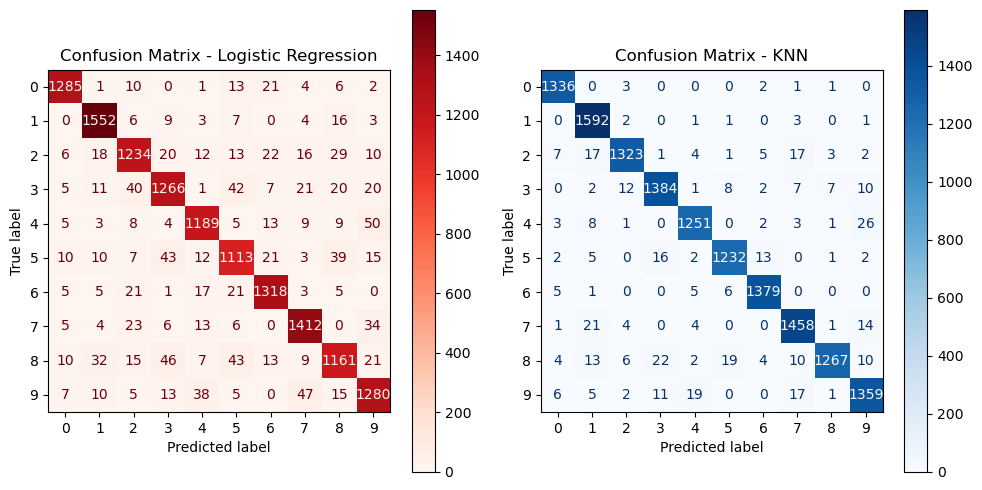

In [14]:
# Define custom colormaps
knn_cmap = plt.cm.get_cmap('Blues').copy()
knn_cmap.set_bad(color='lightgray')  # Set the color for the 'bad' values (outside the confusion matrix)

logistic_cmap = plt.cm.get_cmap('Reds')  # Use Reds colormap for Logistic Regression

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix for Logistic Regression 
plot_confusion_matrix(logistic_model, X_test, y_test, cmap=logistic_cmap, ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')

# Plot confusion matrix for KNN
plot_confusion_matrix(knn_model, X_test, y_test, cmap=knn_cmap, ax=axes[1])
axes[1].set_title('Confusion Matrix - KNN')

plt.tight_layout()
plt.show()

Train Score knn: 0.9808392857142857
Test Score knn: 0.9700714285714286
Train Score logistic: 0.9446785714285715
Test Score logistic: 0.915
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


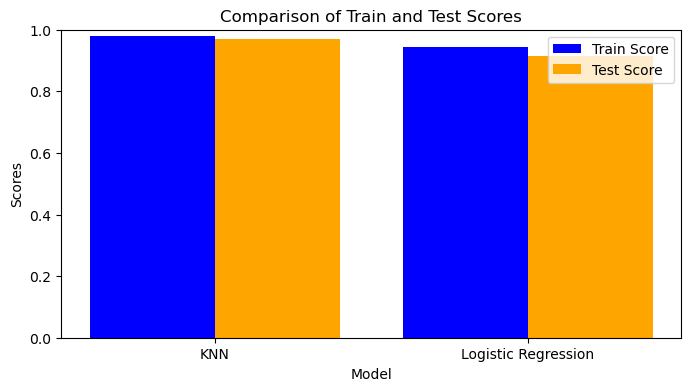

In [15]:
# Train score & Test score (KNeighbors)
knn_train_score = knn_model.score(X_train, y_train)
print("Train Score knn:", knn_train_score)
knn_test_score = knn_model.score(X_test, y_test)
print("Test Score knn:", knn_test_score)

print('==============================')

# Train score & Test score (Logistic Regression)
lr_train_score = logistic_model.score(X_train, y_train)
print("Train Score logistic:", lr_train_score)
lr_test_score = logistic_model.score(X_test, y_test)
print("Test Score logistic:", lr_test_score)

print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

# Plotting results (Train and Test Scores logistic_model & knn_model (Train Score'blue', Test Score'orange' ))
models = ['KNN', 'Logistic Regression']
train_scores = [knn_train_score, lr_train_score]
test_scores = [knn_test_score, lr_test_score]

x = range(len(models))  # Define x here

plt.figure(figsize=(8, 4))
plt.bar(x, train_scores, width=0.4, label='Train Score', color='blue')
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test Score', color='orange')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Train and Test Scores')
plt.xticks([i + 0.2 for i in x], models)
plt.ylim(0, 1)
plt.legend()
plt.show()

Accuracy KNN: 0.9700714285714286
Accuracy logistic : 0.915
++++++++++++++++++++++++++++++++++++++++++++++++++++


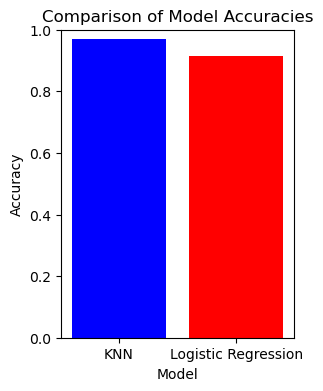

In [16]:
# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy KNN:", knn_accuracy)
print ('==============================')
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Accuracy logistic :", logistic_accuracy)

print ('++++++++++++++++++++++++++++++++++++++++++++++++++++')

# Plotting results Accuracy logistic_model & knn_model
plt.figure(figsize=(3, 4))

models = ['KNN', 'Logistic Regression']
accuracies = [knn_accuracy, logistic_accuracy]
plt.bar(models, accuracies, color=['blue', 'red'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Time taken for KNN fitting: 0.24010896682739258
Time taken for KNN prediction: 22.48050570487976


C:\Users\AHMAD\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time taken for Logistic Regression fitting: 11.818668365478516
Time taken for Logistic Regression prediction: 0.1256258487701416
++++++++++++++++++++++++++++++++++++++++++++++++++++


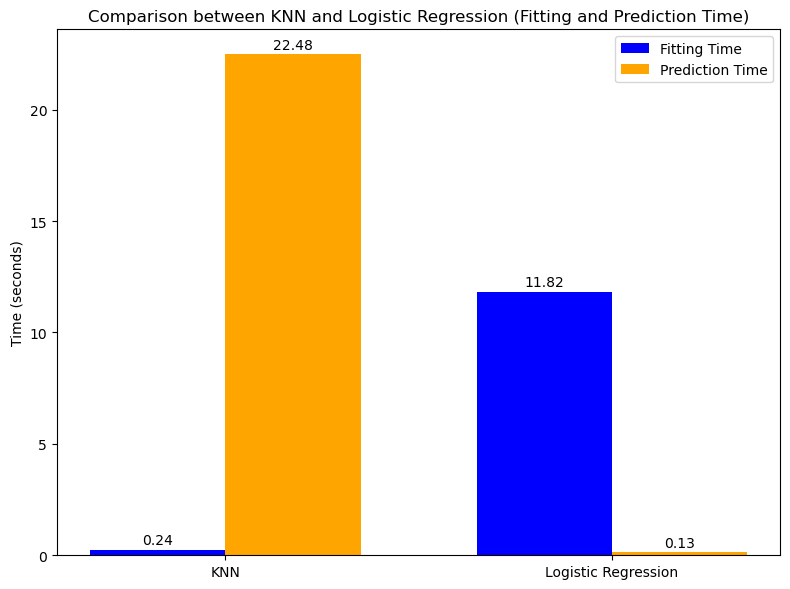

In [17]:
# (Time taken for KNN fitting and prediction )
start_time = time.time()
knn_model.fit(X_train, y_train)
end_time = time.time()
knn_fit_time = end_time - start_time
print("Time taken for KNN fitting:", knn_fit_time)
print('==============================')
start_time = time.time()
knn_predictions = knn_model.predict(X_test)
end_time = time.time()
knn_pred_time = end_time - start_time
print("Time taken for KNN prediction:", knn_pred_time)
print('==============================')

# (Time taken for logistic regression fitting and prediction )
start_time = time.time()
logistic_model.fit(X_train, y_train)
end_time = time.time()
logistic_fit_time = end_time - start_time
print("Time taken for Logistic Regression fitting:", logistic_fit_time)
print('==============================')
start_time = time.time()
logistic_predictions = logistic_model.predict(X_test)
end_time = time.time()
logistic_pred_time = end_time - start_time
print("Time taken for Logistic Regression prediction:", logistic_pred_time)

print('++++++++++++++++++++++++++++++++++++++++++++++++++++')

# Plotting the comparison of fitting time and prediction time
models = ['KNN', 'Logistic Regression']
fit_times = [knn_fit_time, logistic_fit_time]
pred_times = [knn_pred_time, logistic_pred_time]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
Fitting = ax.bar(x - width/2, fit_times, width, label='Fitting Time', color='blue')
Prediction = ax.bar(x + width/2, pred_times, width, label='Prediction Time', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison between KNN and Logistic Regression (Fitting and Prediction Time)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(Fitting)
autolabel(Prediction)

fig.tight_layout()

plt.show()

## Final testing of models

In [18]:
# Best model
best_model = "KNN" if knn_accuracy > logistic_accuracy else "Logistic Regression"
print("Best Model:", best_model)
print("Best Score:", max(knn_accuracy, logistic_accuracy))

Best Model: KNN
Best Score: 0.9700714285714286


In [19]:
# Conclusions
print("Conclusions")
if knn_accuracy > logistic_accuracy:
    print("The best model is KNN with an accuracy of", knn_accuracy)
else:
    print("The best model is Logistic Regression with an accuracy of", logistic_accuracy)

Conclusions
The best model is KNN with an accuracy of 0.9700714285714286
